# Name: Anurag Bapat

## Data Science Internship at LetsGrowMore

## Task 4: Prediction Using Decision Tree Algorithm

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [6]:
iris.corr()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000

In [7]:
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

#### Checking the number of samples of each species

In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### There is no reason to keep 'Id' column. So it is dropped

In [9]:
iris = iris.drop("Id", axis=1)
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

### Visualisation

#### Scatterplot of sepal length and sepal width

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

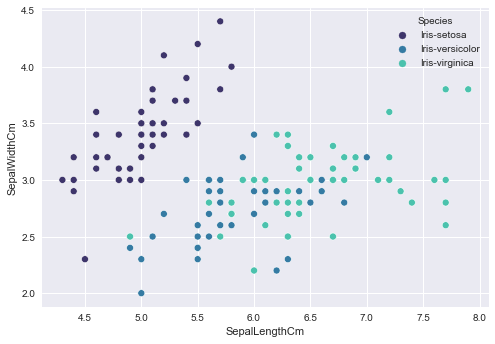

In [10]:
plt.style.use('seaborn')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', palette='mako')

#### Scatterplot of petal length and petal width

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

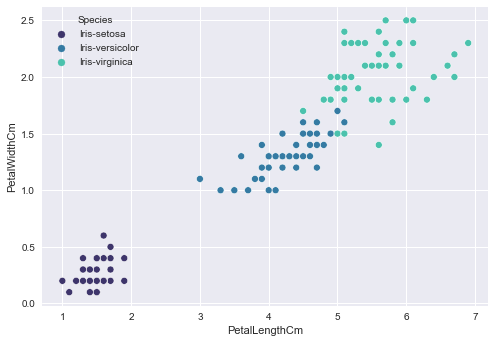

In [11]:
plt.style.use('seaborn')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', palette='mako')

#### Pairplot
This shows the distribution per column and per species on the diagonal. We can see from the rest of the plots that setosa has different characteristics from versicolor and virginica while versicolor and virginica are quite similar in some respects and hence tougher to distinguish.

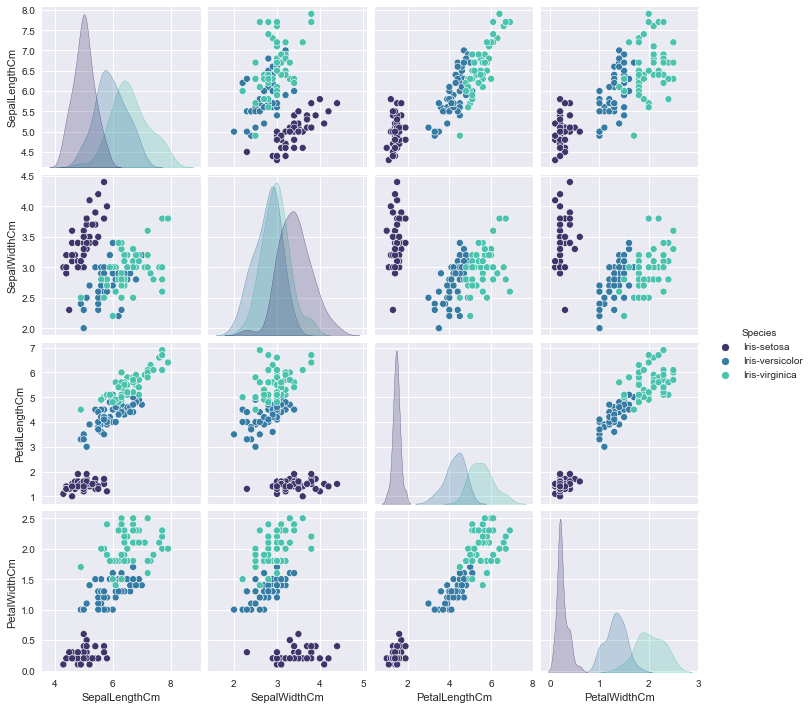

In [12]:
sns.pairplot(iris, hue='Species', palette='mako')

### Machine Learning

Separating result and variable columns

In [13]:
X = iris.drop("Species", axis=1)
Y = iris["Species"]

Creating test and training sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

Checking if the sets are shuffled

In [15]:
X_train.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
47             4.6           3.2            1.4           0.2
74             6.4           2.9            4.3           1.3
146            6.3           2.5            5.0           1.9
80             5.5           2.4            3.8           1.1
27             5.2           3.5            1.5           0.2

In [16]:
X_test.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
11             4.8           3.4            1.6           0.2
134            6.1           2.6            5.6           1.4
52             6.9           3.1            4.9           1.5
30             4.8           3.1            1.6           0.2

Applying decision tree classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
Y_pred = dtc.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_pred, Y_test)}")

Accuracy: 0.9


Proceeding with plotting the tree

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X, Y)

DecisionTreeClassifier()

plot_tree and tree libraries are needed to plot the decision tree

In [20]:
from sklearn.tree import plot_tree
from sklearn import tree

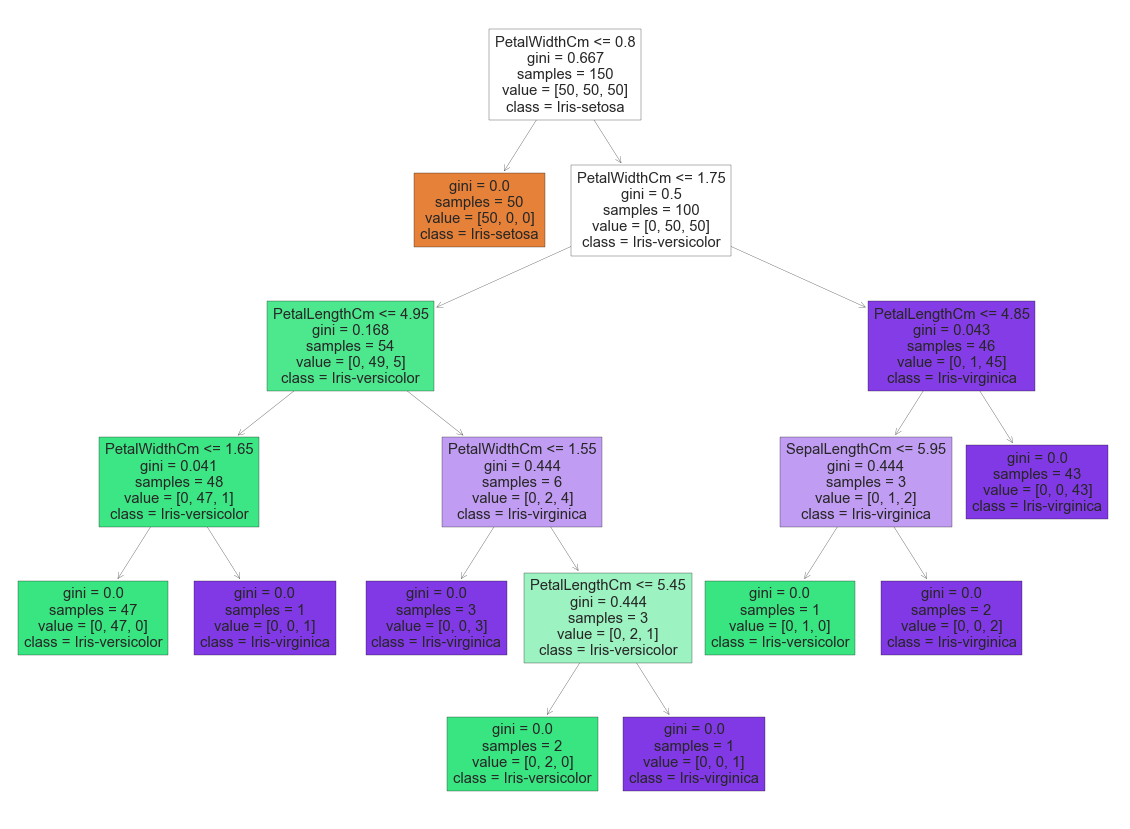

In [21]:
plt.figure(figsize=(20,15))
tree = tree.plot_tree(dtree, 
                      feature_names=list(iris.columns[:4]), 
                      class_names=list(iris.Species.unique()), 
                      filled=True)